In [1]:
import pandas as pd
import warnings
import matplotlib.pylab as plt
import seaborn as sns
import sklearn.metrics as metrics
import koreanize_matplotlib  ## 그래프 한글표시
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
warnings.filterwarnings('ignore')
# [f.name for f in plt.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# Data Load

In [2]:
# ori_df = pd.read_csv("/workspace/autoML/crisis_1127ver2.csv")
ori_df = pd.read_csv("/workspace/03_crisis_classification/datasets/crisis_total.csv")
ori_df.head()

,file,crisis_level,gender,age,class_level,interaction_label,abuse_label,group,enviroment,pain,...,happiness,future,neglect,emotional_abuse,physical_abuse,sexual_abuse,domestic_violence,school_violence,self_harm,runaway
0,0732.json,관찰필요,남,8,저학년,협조적,(해당 없음),일반아동,일반(핵가족 이상),0,...,0,0,0,0,0,0,0,0,0,0
1,1365.json,관찰필요,여,9,저학년,협조적,(해당 없음),일반아동,일반(핵가족 이상),5,...,0,0,0,0,0,0,0,0,0,0
2,3732.json,관찰필요,남,7,저학년,회피적,(해당 없음),시설거주 아동,시설거주,0,...,0,0,0,0,0,0,0,0,0,0
3,0152.json,관찰필요,남,9,저학년,협조적,(해당 없음),저소득,시설거주,0,...,0,0,0,0,0,0,6,0,0,6
4,3210.json,응급,남,8,저학년,협조적,정서학대,학대경험 아동,시설거주,7,...,0,0,3,3,0,0,0,0,0,0


In [3]:
# 컬럼 별 null 값 있는지 체크

ori_df.isnull().sum()

file                 0
crisis_level         0
gender               0
age                  0
class_level          0
interaction_label    0
abuse_label          0
group                0
enviroment           0
pain                 0
physical_injury      0
joy                  0
anger                0
sleep                0
father_problem       0
mother_problem       0
ohthers              0
siblings             0
friends              0
teacher              0
worry                0
happiness            0
future               0
neglect              0
emotional_abuse      0
physical_abuse       0
sexual_abuse         0
domestic_violence    0
school_violence      0
self_harm            0
runaway              0
dtype: int64

In [4]:
## 위 단계에서 null값이 발견된 경우 어떤 행에 null 값이 있는 경우 확인 


null_values_column2 = ori_df[ori_df['enviroment'].isnull()]

print("Rows with Null Values in Column2:")
print(null_values_column2)

Rows with Null Values in Column2:
Empty DataFrame
Columns: [file, crisis_level, gender, age, class_level, interaction_label, abuse_label, group, enviroment, pain, physical_injury, joy, anger, sleep, father_problem, mother_problem, ohthers, siblings, friends, teacher, worry, happiness, future, neglect, emotional_abuse, physical_abuse, sexual_abuse, domestic_violence, school_violence, self_harm, runaway]
Index: []

[0 rows x 31 columns]


In [5]:
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file               3596 non-null   object
 1   crisis_level       3596 non-null   object
 2   gender             3596 non-null   object
 3   age                3596 non-null   int64 
 4   class_level        3596 non-null   object
 5   interaction_label  3596 non-null   object
 6   abuse_label        3596 non-null   object
 7   group              3596 non-null   object
 8   enviroment         3596 non-null   object
 9   pain               3596 non-null   int64 
 10  physical_injury    3596 non-null   int64 
 11  joy                3596 non-null   int64 
 12  anger              3596 non-null   int64 
 13  sleep              3596 non-null   int64 
 14  father_problem     3596 non-null   int64 
 15  mother_problem     3596 non-null   int64 
 16  ohthers            3596 non-null   int64 


In [6]:
df = ori_df.copy()

In [7]:
## 라벨 컬럼 분포 확인

df['crisis_level'].value_counts()

응급      738
정상군     735
학대의심    717
상담필요    705
관찰필요    701
Name: crisis_level, dtype: int64

# 시각화

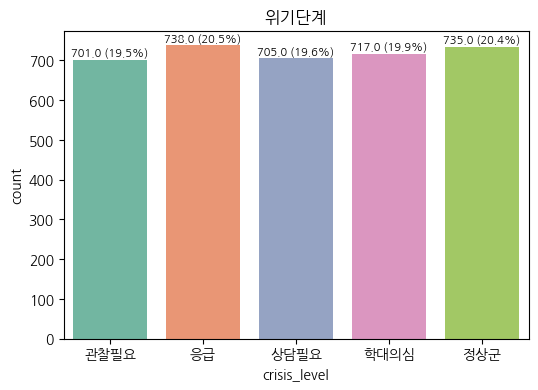

In [8]:


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='crisis_level', palette='Set2')

plt.title('위기단계')

total = len(df['crisis_level'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

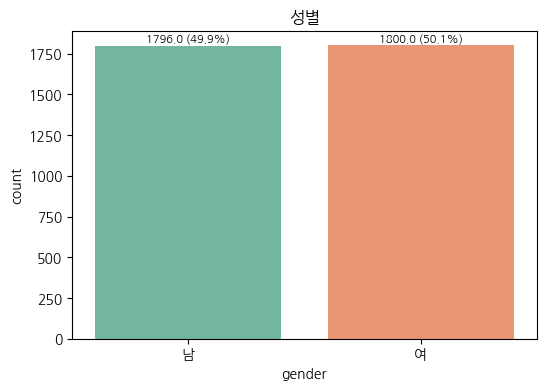

In [9]:


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='gender', palette='Set2')

plt.title('성별')

total = len(df['gender'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

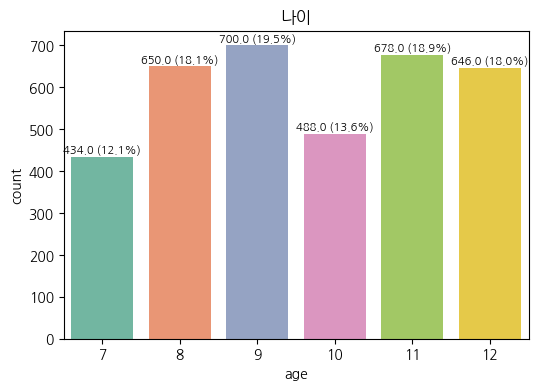

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='age', palette='Set2')

plt.title('나이')

total = len(df['age'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

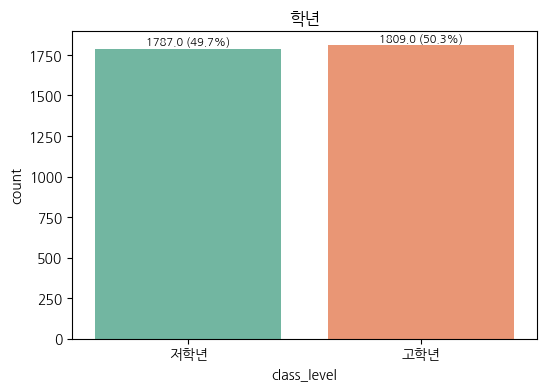

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='class_level', palette='Set2')

plt.title('학년')

total = len(df['class_level'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

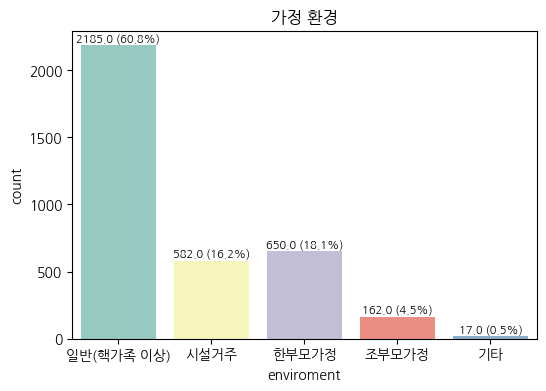

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='enviroment', palette='Set3')

plt.title('가정 환경')

total = len(df['age'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [13]:
df['enviroment'].value_counts()

일반(핵가족 이상)    2185
한부모가정          650
시설거주           582
조부모가정          162
기타              17
Name: enviroment, dtype: int64

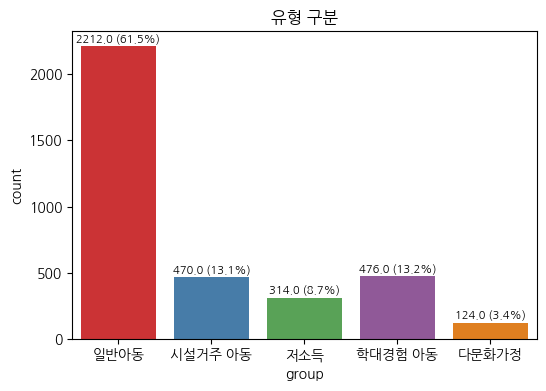

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='group', palette='Set1')

plt.title('유형 구분')

total = len(df['age'])  # Total number of data points

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Data Split

In [15]:
## Data Split
## 총 수량 3596 개 / train valid test 8:1:1 비율로 나눕니다.
## randomseed 고정 필수


train_df, valtest = train_test_split(df, train_size=0.8, stratify=df['crisis_level'], random_state=42)
val_df, test_df = train_test_split(valtest, train_size=0.5, random_state=42)

In [16]:
train_df['crisis_level'].value_counts().sort_index()

관찰필요    561
상담필요    564
응급      590
정상군     588
학대의심    573
Name: crisis_level, dtype: int64

In [17]:
val_df['crisis_level'].value_counts().sort_index()

관찰필요    68
상담필요    68
응급      78
정상군     82
학대의심    64
Name: crisis_level, dtype: int64

In [18]:
test_df['crisis_level'].value_counts().sort_index()

관찰필요    72
상담필요    73
응급      70
정상군     65
학대의심    80
Name: crisis_level, dtype: int64

In [20]:
test_df.to_csv("/workspace/03_crisis_classification/datasets/평가용데이터셋.csv", index=False, encoding='utf-8-sig')

In [22]:
## 라벨 값 설정

label = 'crisis_level'

In [24]:
# 학습에 불필요한 file 컬럼 제거
train_df = train_df.drop(columns=["file"])
val_df = val_df.drop(columns=["file"])

In [25]:
predictor = TabularPredictor(label=label, eval_metric='f1_weighted', path='/workspace/03_crisis_classification/weight/model/').fit(train_data=train_df, tuning_data=val_df, use_bag_holdout=True, num_gpus=1, verbosity=4)

============ fit kwarg info ============
User Specified kwargs:
{'use_bag_holdout': True, 'verbosity': 4}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': False,
 'calibrate': 'auto',
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'included_model_types': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': True,
 'verbosity': 4}
Saving /workspace/03_crisis_classification/weight/model/learner.pkl
Saving /workspace/03_crisis_classification/weight/model/predictor.pkl
Beginning AutoGluon training ...
AutoGluon will save models to "/workspace/03_crisis_classificati

[1]	valid_set's multi_logloss: 1.50415	valid_set's f1_weighted: 0.733943
[2]	valid_set's multi_logloss: 1.4109	valid_set's f1_weighted: 0.80461
[3]	valid_set's multi_logloss: 1.33547	valid_set's f1_weighted: 0.796462
[4]	valid_set's multi_logloss: 1.26337	valid_set's f1_weighted: 0.809882
[5]	valid_set's multi_logloss: 1.20437	valid_set's f1_weighted: 0.810163
[6]	valid_set's multi_logloss: 1.14806	valid_set's f1_weighted: 0.809555
[7]	valid_set's multi_logloss: 1.09397	valid_set's f1_weighted: 0.809381
[8]	valid_set's multi_logloss: 1.04526	valid_set's f1_weighted: 0.815004
[9]	valid_set's multi_logloss: 1.00321	valid_set's f1_weighted: 0.817764
[10]	valid_set's multi_logloss: 0.964226	valid_set's f1_weighted: 0.811893
[11]	valid_set's multi_logloss: 0.929014	valid_set's f1_weighted: 0.817881
[12]	valid_set's multi_logloss: 0.896875	valid_set's f1_weighted: 0.817835
[13]	valid_set's multi_logloss: 0.866674	valid_set's f1_weighted: 0.815284
[14]	valid_set's multi_logloss: 0.835812	vali

Saving weight/model/models/LightGBMXT/model.pkl
Saving weight/model/utils/attr/LightGBMXT/y_pred_proba_val.pkl
	0.8914	 = Validation score   (f1_weighted)
	2.65s	 = Training   runtime
	0.0s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: LightGBM ...
	Dropped 0 of 29 features.
	Fitting LightGBM with 'num_gpus': 1, 'num_cpus': 14
	Training LightGBM with GPU, note that this may negatively impact model quality compared to CPU training.
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'device': 'gpu'}


[393]	valid_set's multi_logloss: 0.458135	valid_set's f1_weighted: 0.880438
[394]	valid_set's multi_logloss: 0.45912	valid_set's f1_weighted: 0.880438


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


[1]	valid_set's multi_logloss: 1.47702	valid_set's f1_weighted: 0.849133
[2]	valid_set's multi_logloss: 1.36959	valid_set's f1_weighted: 0.849239
[3]	valid_set's multi_logloss: 1.27767	valid_set's f1_weighted: 0.849279
[4]	valid_set's multi_logloss: 1.19872	valid_set's f1_weighted: 0.851973
[5]	valid_set's multi_logloss: 1.12875	valid_set's f1_weighted: 0.857881
[6]	valid_set's multi_logloss: 1.06677	valid_set's f1_weighted: 0.860732
[7]	valid_set's multi_logloss: 1.01029	valid_set's f1_weighted: 0.863577
[8]	valid_set's multi_logloss: 0.960474	valid_set's f1_weighted: 0.863573
[9]	valid_set's multi_logloss: 0.91554	valid_set's f1_weighted: 0.863533
[10]	valid_set's multi_logloss: 0.875072	valid_set's f1_weighted: 0.863567
[11]	valid_set's multi_logloss: 0.837341	valid_set's f1_weighted: 0.863538
[12]	valid_set's multi_logloss: 0.800719	valid_set's f1_weighted: 0.863538
[13]	valid_set's multi_logloss: 0.769636	valid_set's f1_weighted: 0.866377
[14]	valid_set's multi_logloss: 0.741263	v

Saving weight/model/models/LightGBM/model.pkl
Saving weight/model/utils/attr/LightGBM/y_pred_proba_val.pkl
	0.9111	 = Validation score   (f1_weighted)
	1.87s	 = Training   runtime
	0.0s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: RandomForestGini ...
	Dropped 0 of 29 features.
	Fitting RandomForestGini with 'num_gpus': 1, 'num_cpus': 28


[361]	valid_set's multi_logloss: 0.462791	valid_set's f1_weighted: 0.891552
[362]	valid_set's multi_logloss: 0.463803	valid_set's f1_weighted: 0.888733
[363]	valid_set's multi_logloss: 0.463867	valid_set's f1_weighted: 0.888733
[364]	valid_set's multi_logloss: 0.464832	valid_set's f1_weighted: 0.888733
[365]	valid_set's multi_logloss: 0.465439	valid_set's f1_weighted: 0.888733
[366]	valid_set's multi_logloss: 0.466414	valid_set's f1_weighted: 0.888733
[367]	valid_set's multi_logloss: 0.467469	valid_set's f1_weighted: 0.888733
[368]	valid_set's multi_logloss: 0.469017	valid_set's f1_weighted: 0.888733


Saving weight/model/models/RandomForestGini/model.pkl
Saving weight/model/utils/attr/RandomForestGini/y_pred_proba_val.pkl
	0.8999	 = Validation score   (f1_weighted)
	1.22s	 = Training   runtime
	0.14s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: RandomForestEntr ...
	Dropped 0 of 29 features.
	Fitting RandomForestEntr with 'num_gpus': 1, 'num_cpus': 28
Saving weight/model/models/RandomForestEntr/model.pkl
Saving weight/model/utils/attr/RandomForestEntr/y_pred_proba_val.pkl
	0.8944	 = Validation score   (f1_weighted)
	1.14s	 = Training   runtime
	0.14s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: CatBoost ...
	Dropped 0 of 29 features.
	Fitting CatBoost with 'num_gpus': 1, 'num_cpus': 14
	Training CatBoost with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_me

0:	learn: 1.5505751	test: 1.5498847	best: 1.5498847 (0)	total: 40.1ms	remaining: 6m 40s
1:	learn: 1.4953165	test: 1.4941800	best: 1.4941800 (1)	total: 48.4ms	remaining: 4m 1s
2:	learn: 1.4506422	test: 1.4490477	best: 1.4490477 (2)	total: 55.6ms	remaining: 3m 5s
3:	learn: 1.4050389	test: 1.4030225	best: 1.4030225 (3)	total: 62.7ms	remaining: 2m 36s
4:	learn: 1.3664053	test: 1.3648390	best: 1.3648390 (4)	total: 69.7ms	remaining: 2m 19s
5:	learn: 1.3297837	test: 1.3278197	best: 1.3278197 (5)	total: 76.7ms	remaining: 2m 7s
6:	learn: 1.2946810	test: 1.2933694	best: 1.2933694 (6)	total: 83.5ms	remaining: 1m 59s
7:	learn: 1.2632663	test: 1.2617073	best: 1.2617073 (7)	total: 90.5ms	remaining: 1m 53s
8:	learn: 1.2323679	test: 1.2292760	best: 1.2292760 (8)	total: 97.3ms	remaining: 1m 47s
9:	learn: 1.2058379	test: 1.2015495	best: 1.2015495 (9)	total: 104ms	remaining: 1m 44s
10:	learn: 1.1801585	test: 1.1749000	best: 1.1749000 (10)	total: 111ms	remaining: 1m 41s
11:	learn: 1.1548877	test: 1.150050

Saving weight/model/models/CatBoost/model.pkl
Saving weight/model/utils/attr/CatBoost/y_pred_proba_val.pkl
	0.8943	 = Validation score   (f1_weighted)
	5.86s	 = Training   runtime
	0.01s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: ExtraTreesGini ...
	Dropped 0 of 29 features.
	Fitting ExtraTreesGini with 'num_gpus': 1, 'num_cpus': 28


837:	learn: 0.1638040	test: 0.3151220	best: 0.3149326 (794)	total: 5.11s	remaining: 55.9s
838:	learn: 0.1637588	test: 0.3151885	best: 0.3149326 (794)	total: 5.12s	remaining: 55.9s
839:	learn: 0.1636037	test: 0.3151585	best: 0.3149326 (794)	total: 5.12s	remaining: 55.9s
840:	learn: 0.1634813	test: 0.3152679	best: 0.3149326 (794)	total: 5.13s	remaining: 55.9s
841:	learn: 0.1633732	test: 0.3152866	best: 0.3149326 (794)	total: 5.13s	remaining: 55.9s
842:	learn: 0.1632391	test: 0.3153776	best: 0.3149326 (794)	total: 5.14s	remaining: 55.8s
843:	learn: 0.1631224	test: 0.3153281	best: 0.3149326 (794)	total: 5.15s	remaining: 55.8s
844:	learn: 0.1630327	test: 0.3153588	best: 0.3149326 (794)	total: 5.15s	remaining: 55.8s
bestTest = 0.3149326324
bestIteration = 794
Shrink model to first 795 iterations.


Saving weight/model/models/ExtraTreesGini/model.pkl
Saving weight/model/utils/attr/ExtraTreesGini/y_pred_proba_val.pkl
	0.8832	 = Validation score   (f1_weighted)
	1.25s	 = Training   runtime
	0.15s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: ExtraTreesEntr ...
	Dropped 0 of 29 features.
	Fitting ExtraTreesEntr with 'num_gpus': 1, 'num_cpus': 28
Saving weight/model/models/ExtraTreesEntr/model.pkl
Saving weight/model/utils/attr/ExtraTreesEntr/y_pred_proba_val.pkl
	0.8722	 = Validation score   (f1_weighted)
	1.12s	 = Training   runtime
	0.14s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: XGBoost ...
	Dropped 0 of 29 features.
	Fitting XGBoost with 'num_gpus': 1, 'num_cpus': 14


[0]	validation_0-mlogloss:1.46722	validation_0-custom_metric:-0.80866
[1]	validation_0-mlogloss:1.35082	validation_0-custom_metric:-0.83718
[2]	validation_0-mlogloss:1.25113	validation_0-custom_metric:-0.84004
[3]	validation_0-mlogloss:1.16401	validation_0-custom_metric:-0.84257
[4]	validation_0-mlogloss:1.09078	validation_0-custom_metric:-0.84568
[5]	validation_0-mlogloss:1.02633	validation_0-custom_metric:-0.85454
[6]	validation_0-mlogloss:0.96979	validation_0-custom_metric:-0.85358
[7]	validation_0-mlogloss:0.91969	validation_0-custom_metric:-0.85358
[8]	validation_0-mlogloss:0.87453	validation_0-custom_metric:-0.85628
[9]	validation_0-mlogloss:0.83393	validation_0-custom_metric:-0.85628
[10]	validation_0-mlogloss:0.79713	validation_0-custom_metric:-0.85628
[11]	validation_0-mlogloss:0.76265	validation_0-custom_metric:-0.85353
[12]	validation_0-mlogloss:0.73243	validation_0-custom_metric:-0.85353
[13]	validation_0-mlogloss:0.70468	validation_0-custom_metric:-0.85165
[14]	validation_

Saving weight/model/models/XGBoost/model.pkl
Saving weight/model/utils/attr/XGBoost/y_pred_proba_val.pkl
	0.9027	 = Validation score   (f1_weighted)
	3.43s	 = Training   runtime
	0.01s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Fitting model: NeuralNetTorch ...
	Dropped 0 of 29 features.
	Fitting NeuralNetTorch with 'num_gpus': 1, 'num_cpus': 14
Tabular Neural Network treats features as the following types:
{
    "continuous": [
        "age",
        "anger",
        "sleep",
        "worry",
        "happiness"
    ],
    "skewed": [
        "pain",
        "physical_injury",
        "joy",
        "father_problem",
        "mother_problem",
        "ohthers",
        "siblings",
        "friends",
        "teacher",
        "future",
        "neglect",
        "emotional_abuse",
        "physical_abuse",
        "sexual_abuse",
        "domestic_violence",
        "school_violence",
        "self_harm",
        "runaway"
    ],
    "onehot": [],
    "embed": [
    

[1]	valid_set's multi_logloss: 1.51896	valid_set's f1_weighted: 0.839021
[2]	valid_set's multi_logloss: 1.44278	valid_set's f1_weighted: 0.864257
[3]	valid_set's multi_logloss: 1.37441	valid_set's f1_weighted: 0.875157
[4]	valid_set's multi_logloss: 1.31125	valid_set's f1_weighted: 0.888961
[5]	valid_set's multi_logloss: 1.25636	valid_set's f1_weighted: 0.883433
[6]	valid_set's multi_logloss: 1.20363	valid_set's f1_weighted: 0.891668
[7]	valid_set's multi_logloss: 1.15303	valid_set's f1_weighted: 0.88603
[8]	valid_set's multi_logloss: 1.10796	valid_set's f1_weighted: 0.894407
[9]	valid_set's multi_logloss: 1.06516	valid_set's f1_weighted: 0.89156
[10]	valid_set's multi_logloss: 1.02674	valid_set's f1_weighted: 0.891589
[11]	valid_set's multi_logloss: 0.989222	valid_set's f1_weighted: 0.894398
[12]	valid_set's multi_logloss: 0.954618	valid_set's f1_weighted: 0.89156
[13]	valid_set's multi_logloss: 0.921026	valid_set's f1_weighted: 0.894229
[14]	valid_set's multi_logloss: 0.889575	valid_

Saving weight/model/models/LightGBMLarge/model.pkl


[352]	valid_set's multi_logloss: 0.655311	valid_set's f1_weighted: 0.885993
[353]	valid_set's multi_logloss: 0.656255	valid_set's f1_weighted: 0.885993
[354]	valid_set's multi_logloss: 0.656779	valid_set's f1_weighted: 0.885993
[355]	valid_set's multi_logloss: 0.657258	valid_set's f1_weighted: 0.885993
[356]	valid_set's multi_logloss: 0.658213	valid_set's f1_weighted: 0.885993
[357]	valid_set's multi_logloss: 0.658959	valid_set's f1_weighted: 0.885993
[358]	valid_set's multi_logloss: 0.659585	valid_set's f1_weighted: 0.885993
[359]	valid_set's multi_logloss: 0.659754	valid_set's f1_weighted: 0.885993
[360]	valid_set's multi_logloss: 0.660365	valid_set's f1_weighted: 0.885993
[361]	valid_set's multi_logloss: 0.660887	valid_set's f1_weighted: 0.885993
[362]	valid_set's multi_logloss: 0.661699	valid_set's f1_weighted: 0.888808
[363]	valid_set's multi_logloss: 0.662099	valid_set's f1_weighted: 0.888808
[364]	valid_set's multi_logloss: 0.66265	valid_set's f1_weighted: 0.888808
[365]	valid_s

Saving weight/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
	0.9054	 = Validation score   (f1_weighted)
	4.91s	 = Training   runtime
	0.0s	 = Validation runtime
Saving weight/model/models/trainer.pkl
Loading: weight/model/utils/attr/KNeighborsUnif/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/RandomForestGini/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/ExtraTreesEntr/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/NeuralNetTorch/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/RandomForestEntr/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/NeuralNetFastAI/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/KNeighborsDist/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/ExtraTreesGini/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/XGBoost/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/LightGBMXT/y_pred_proba_val.pkl
Loading: weight/model/utils/attr/CatBoost/

In [ ]:
predictor.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.922111       0.460405  24.648791                0.002825           1.198526            2       True         14
1              LightGBM   0.911097       0.003968   1.902345                0.003968           1.902345            1       True          5
2               XGBoost   0.908267       0.008302   1.347282                0.008302           1.347282            1       True         11
3         LightGBMLarge   0.905392       0.004468   4.498474                0.004468           4.498474            1       True         13
4      RandomForestGini   0.899873       0.199426   1.318568                0.199426           1.318568            1       True          6
5      RandomForestEntr   0.894427       0.199948   1.282068                0.199948           1.282068            1       True          7
6            LightGBMXT   0

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.922111,0.460405,24.648791,0.002825,1.198526,2,True,14
1,LightGBM,0.911097,0.003968,1.902345,0.003968,1.902345,1,True,5
2,XGBoost,0.908267,0.008302,1.347282,0.008302,1.347282,1,True,11
3,LightGBMLarge,0.905392,0.004468,4.498474,0.004468,4.498474,1,True,13
4,RandomForestGini,0.899873,0.199426,1.318568,0.199426,1.318568,1,True,6
5,RandomForestEntr,0.894427,0.199948,1.282068,0.199948,1.282068,1,True,7
6,LightGBMXT,0.891351,0.005748,2.747952,0.005748,2.747952,1,True,4
7,ExtraTreesGini,0.883223,0.202260,1.478286,0.202260,1.478286,1,True,9
8,CatBoost,0.883079,0.011181,13.514864,0.011181,13.514864,1,True,8
9,ExtraTreesEntr,0.872201,0.202747,1.332674,0.202747,1.332674,1,True,10


In [ ]:
summary = predictor.fit_summary(verbosity=3, show_plot=False)
print(summary)

Loading: //workspace/03_crisis_classification/weight/model/models/KNeighborsUnif/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/KNeighborsDist/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/NeuralNetFastAI/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/NeuralNetFastAI/model-internals.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/LightGBMXT/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/LightGBM/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/RandomForestGini/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/RandomForestEntr/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/CatBoost/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/ExtraTreesGini/model.pkl
Loading: //workspace/03_crisis_classification/weight/model/models/ExtraTreesEntr/model.pkl

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.922111       0.460405  24.648791                0.002825           1.198526            2       True         14
1              LightGBM   0.911097       0.003968   1.902345                0.003968           1.902345            1       True          5
2               XGBoost   0.908267       0.008302   1.347282                0.008302           1.347282            1       True         11
3         LightGBMLarge   0.905392       0.004468   4.498474                0.004468           4.498474            1       True         13
4      RandomForestGini   0.899873       0.199426   1.318568                0.199426           1.318568            1       True          6
5      RandomForestEntr   0.894427       0.199948   1.282068                0.199948           1.282068 

# TEST

In [26]:
predictor = TabularPredictor.load(path="/workspace/03_crisis_classification/weight/model/")


Loading: /workspace/03_crisis_classification/weight/model/predictor.pkl
Loading: /workspace/03_crisis_classification/weight/model/learner.pkl
Loading: /workspace/03_crisis_classification/weight/model/models/trainer.pkl


In [27]:
test_df_ori= test_df.copy()

test_df = test_df.drop(columns=['file'])
test_df

,crisis_level,gender,age,class_level,interaction_label,abuse_label,group,enviroment,pain,physical_injury,...,happiness,future,neglect,emotional_abuse,physical_abuse,sexual_abuse,domestic_violence,school_violence,self_harm,runaway
1503,응급,남,12,고학년,협조적,신체학대,일반아동,일반(핵가족 이상),0,7,...,0,0,0,0,8,0,0,0,0,0
727,상담필요,여,12,고학년,협조적,(해당 없음),일반아동,일반(핵가족 이상),0,7,...,4,0,0,5,0,0,0,0,6,0
1609,응급,여,10,고학년,협조적,방임,일반아동,한부모가정,7,0,...,7,0,8,8,0,0,0,0,6,0
412,관찰필요,남,8,저학년,협조적,(해당 없음),일반아동,일반(핵가족 이상),3,3,...,0,0,0,0,0,0,0,0,0,6
1220,응급,남,7,저학년,수동적,정서학대,일반아동,일반(핵가족 이상),0,0,...,0,0,6,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,학대의심,남,11,고학년,회피적,정서학대,일반아동,일반(핵가족 이상),0,3,...,4,0,0,8,0,0,0,0,0,0
1927,학대의심,남,10,고학년,공격적,신체학대,저소득,한부모가정,0,7,...,7,4,0,0,8,0,0,0,0,6
3199,학대의심,남,8,저학년,공격적,정서학대,다문화가정,일반(핵가족 이상),0,0,...,4,0,6,8,0,0,6,0,6,0
3484,학대의심,여,10,고학년,협조적,신체학대,일반아동,일반(핵가족 이상),0,7,...,0,0,0,0,8,0,0,0,0,0


In [28]:
prediction = predictor.predict(test_df, model='XGBoost')
prediction

Loading: /workspace/03_crisis_classification/weight/model/models/XGBoost/model.pkl


1503    학대의심
727     상담필요
1609    학대의심
412     관찰필요
1220    학대의심
        ... 
2538    학대의심
1927    학대의심
3199    학대의심
3484    학대의심
49      관찰필요
Name: crisis_level, Length: 360, dtype: object

In [29]:
cm = metrics.confusion_matrix(test_df['crisis_level'], prediction)

print(cm)

[[66  0  0  6  0]
 [ 4 66  0  3  0]
 [ 0  4 53  0 13]
 [ 6  1  0 58  0]
 [ 0  2  4  0 74]]


In [30]:
predictor.evaluate(data=test_df, detailed_report=True, model='XGBoost')

Loading: /workspace/03_crisis_classification/weight/model/models/XGBoost/model.pkl
Evaluation: f1_weighted on test data: 0.8796134132795456
Evaluations on test data:
{
    "f1_weighted": 0.8796134132795456,
    "accuracy": 0.8805555555555555,
    "balanced_accuracy": 0.8790453610316623,
    "mcc": 0.8514064716241487
}
Detailed (per-class) classification report:
{
    "\uad00\ucc30\ud544\uc694": {
        "precision": 0.868421052631579,
        "recall": 0.9166666666666666,
        "f1-score": 0.8918918918918918,
        "support": 72
    },
    "\uc0c1\ub2f4\ud544\uc694": {
        "precision": 0.9041095890410958,
        "recall": 0.9041095890410958,
        "f1-score": 0.9041095890410958,
        "support": 73
    },
    "\uc751\uae09": {
        "precision": 0.9298245614035088,
        "recall": 0.7571428571428571,
        "f1-score": 0.8346456692913385,
        "support": 70
    },
    "\uc815\uc0c1\uad70": {
        "precision": 0.8656716417910447,
        "recall": 0.892307692307

{'f1_weighted': 0.8796134132795456,
 'accuracy': 0.8805555555555555,
 'balanced_accuracy': 0.8790453610316623,
 'mcc': 0.8514064716241487,
 'confusion_matrix':       관찰필요  상담필요  응급  정상군  학대의심
 관찰필요    66     0   0    6     0
 상담필요     4    66   0    3     0
 응급       0     4  53    0    13
 정상군      6     1   0   58     0
 학대의심     0     2   4    0    74,
 'classification_report': {'관찰필요': {'precision': 0.868421052631579,
   'recall': 0.9166666666666666,
   'f1-score': 0.8918918918918918,
   'support': 72},
  '상담필요': {'precision': 0.9041095890410958,
   'recall': 0.9041095890410958,
   'f1-score': 0.9041095890410958,
   'support': 73},
  '응급': {'precision': 0.9298245614035088,
   'recall': 0.7571428571428571,
   'f1-score': 0.8346456692913385,
   'support': 70},
  '정상군': {'precision': 0.8656716417910447,
   'recall': 0.8923076923076924,
   'f1-score': 0.8787878787878788,
   'support': 65},
  '학대의심': {'precision': 0.8505747126436781,
   'recall': 0.925,
   'f1-score': 0.8862275449101797

In [31]:
test_df_ori['prediction'] = prediction
result_df = test_df_ori[['file', 'crisis_level', 'prediction']]

result_df.to_csv("/workspace/03_results.csv", index=False, encoding='utf-8-sig')
print("Results saved to CSV.")

Results saved to CSV.
